# Introduction to Machine Learning
# Name: Niyathi Lekkala, Cardinal ID: 5237545
# Name: Vinod Kumar Kethavath, Cardinal ID: 5237582
# Topic: Predicting Breast Cancer Patient Outcomes Using Machine Learning

## 0.1. Introduction
    - Probelm Statement:
    - This project uses Machine Learning models to predict whether a breast cancer patient is likely to survive (Alive) or not (Dead) based on clinical features such as Tumor size, Age, and Treatment history.
    - Data:
        - dataset is csv file .
        - data consists of 4024 rows and 16 columns.
        - The last column Status shows 'Alive' or 'Dead'.

# Part 1: Data Analysis

#### A. Data Exploring and Data Cleaning
#### Importing Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import plot_tree
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

#### 1.1 Viewing Data

In [2]:
#loading dataset
b_cancer=pd.read_csv("Breast_Cancer.csv")
display(b_cancer.head())
b_cancer.shape

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


(4024, 16)

In [3]:
# display null values
b_cancer.isna().sum().sum()

np.int64(0)

In [4]:
# data types
print(b_cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [5]:
#data describe()
b_cancer.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


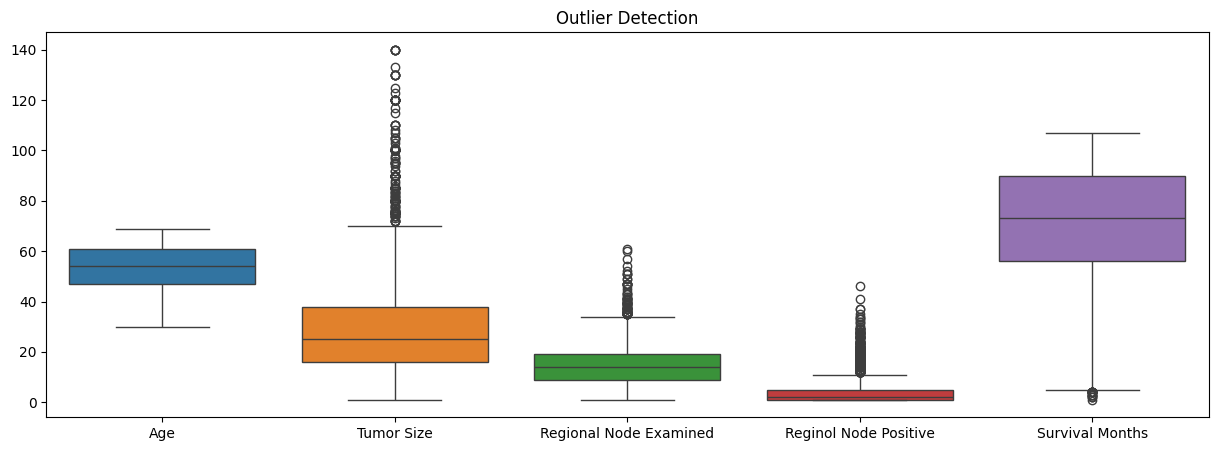

In [6]:
# Outlier detection
plt.figure(figsize=(15,5))
sns.boxplot(data=b_cancer.select_dtypes(include=['float64','int64']))
plt.title("Outlier Detection")
plt.show()

Shape after outlier removal: (3267, 16)


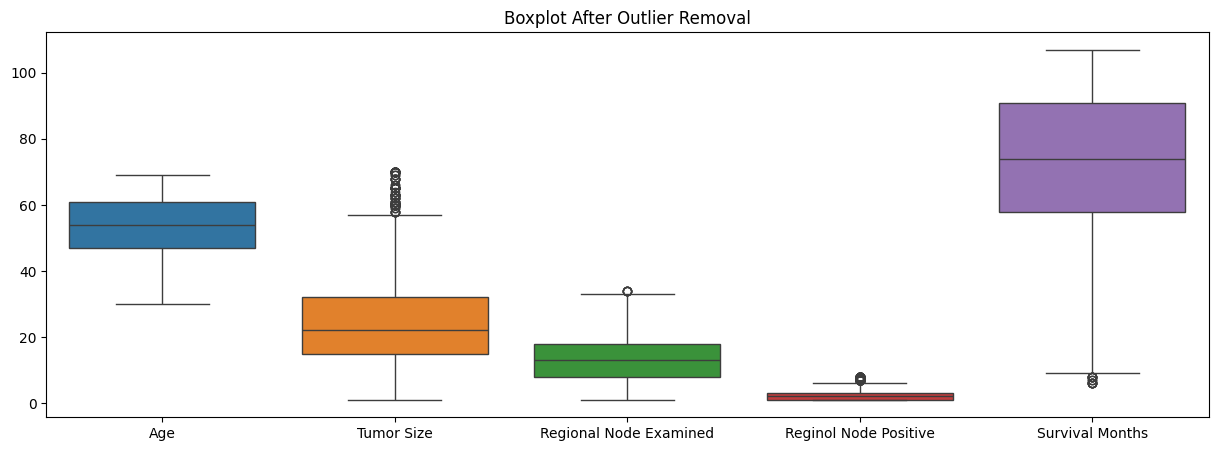

In [7]:
# Copy original dataset
b_cancer_cleaned = b_cancer.copy()

# Define columns to check for outliers
num_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

# Apply IQR method to remove outliers
for col in num_cols:
    Q1 = b_cancer_cleaned[col].quantile(0.25)
    Q3 = b_cancer_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    b_cancer_cleaned = b_cancer_cleaned[(b_cancer_cleaned[col] >= lower_bound) & (b_cancer_cleaned[col] <= upper_bound)]

# Check new shape
print("Shape after outlier removal:", b_cancer_cleaned.shape)

plt.figure(figsize=(15,5))
sns.boxplot(data=b_cancer_cleaned[num_cols])
plt.title("Boxplot After Outlier Removal")
plt.show()


In the above, I have detected the outliers and cleared them, stored them seperately not making any changes to original data as it is a medical data.

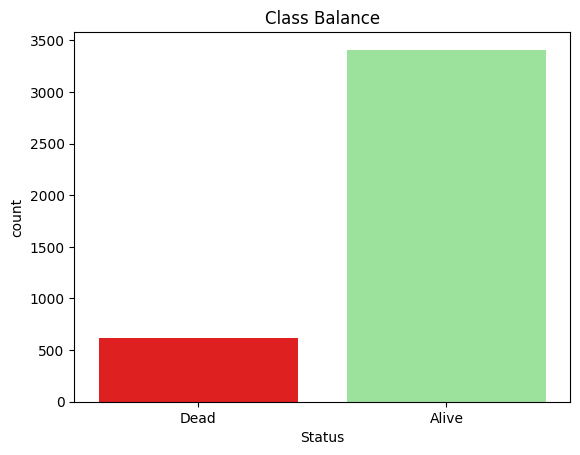

In [8]:
# Class balance
sns.countplot(x="Status",hue="Status",data=b_cancer,order=['Dead','Alive'],palette={'Dead':'red','Alive':'lightgreen'})
plt.title("Class Balance")
plt.show()

Here, our dataset shows a clear imbalance in the target variable 'Status', where the number of patients marked as 'Alive' significantly exceeds those marked as 'Dead. This imbalance can lead to biased predictions where model favors the exceeds the majority class.

#### B. Exploratory Data Analysis

##### Exploratory Data Analysis (EDA)
We explore the distribution of features and the relationship between variables using visualizations.

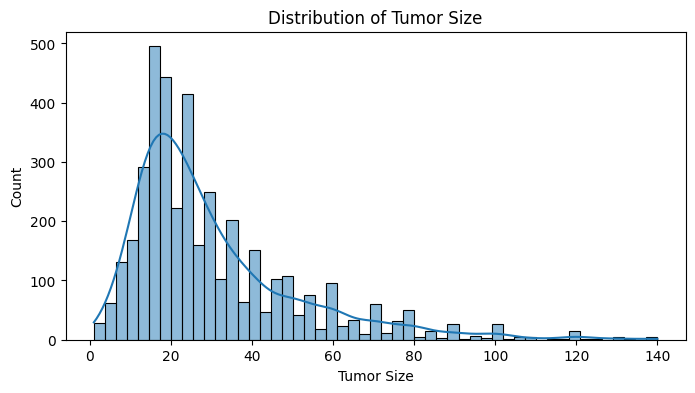

In [9]:
# Histogram of Tumor Size
plt.figure(figsize=(8, 4))
sns.histplot(b_cancer['Tumor Size'], kde=True)
plt.title("Distribution of Tumor Size")
plt.show()

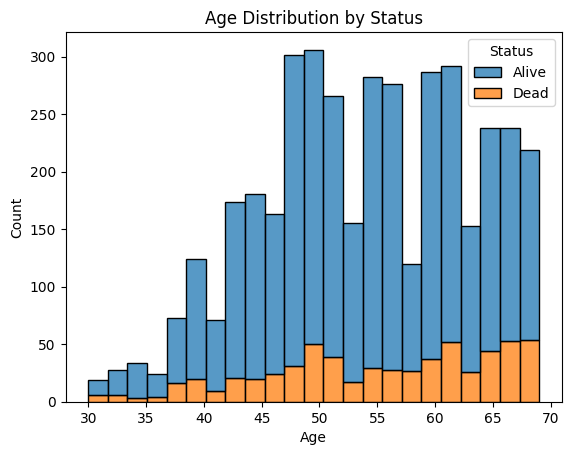

In [10]:
#single column plots
sns.histplot(data=b_cancer,x='Age',hue='Status',multiple='stack')
plt.title('Age Distribution by Status')
plt.show()

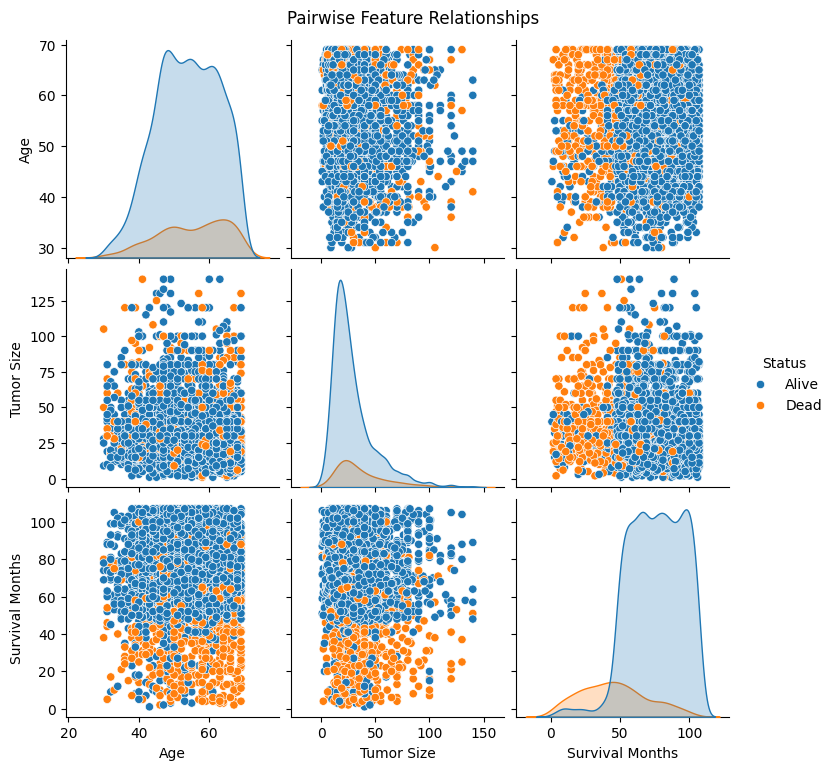

In [11]:
#Pairplot
sns.pairplot(b_cancer[['Age', 'Tumor Size', 'Survival Months', 'Status']], hue='Status')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

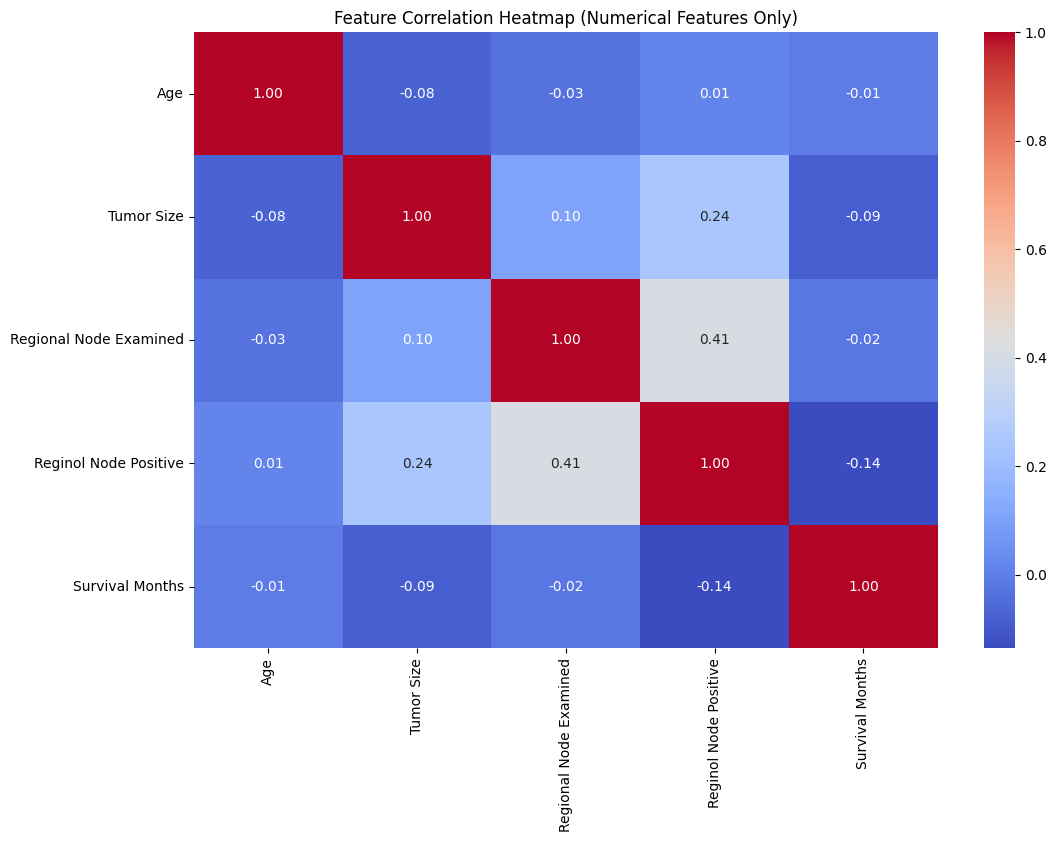

In [12]:
# Now plot heatmap
plt.figure(figsize=(12, 8))
corr_matrix = b_cancer.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap (Numerical Features Only)")
plt.show()

### Part 2: Machine Learning

#### A. Preparing for Machine Learning

#### Feature Engineering

In [13]:
# Define X by dropping the target column
X = b_cancer.drop("Status", axis=1)

# Identifing the categorical and numerical columns
cat_columns=[]
num_columns=[]
for column in X.columns:

    # find discret values <= 5
    if X[column].nunique() <= 5:
        print(f"{column:>10} : {X[column].nunique():}")
        cat_columns.append(column)

    else:
        num_columns.append(column)

      Race : 3
Marital Status : 5
  T Stage  : 4
   N Stage : 3
 6th Stage : 5
differentiate : 4
     Grade : 4
   A Stage : 2
Estrogen Status : 2
Progesterone Status : 2


In [14]:
num_columns

['Age',
 'Tumor Size',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months']

#### Data Cleaning and Preprocessing
We clean column names, encode categorical features, and handle missing values. The target column 'Status' is mapped to binary values: Alive = 1, Dead = 0.

In [15]:
# Clean target column FIRST
b_cancer['Status'] = b_cancer['Status'].astype(str).str.strip().str.lower()
b_cancer['Status'] = b_cancer['Status'].map({'alive': 1, 'dead': 0})

# Separate features and target
X = b_cancer.drop("Status", axis=1)
y = b_cancer["Status"]

# Identify categorical and numerical columns
cat_columns = X.select_dtypes(include=['object']).columns
num_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Encode only categorical columns in X
for col in cat_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Normalize numerical features
scaler = MinMaxScaler()
X_num = pd.DataFrame(scaler.fit_transform(X[num_columns]), columns=num_columns)
X_cat = X[cat_columns].reset_index(drop=True)

# Combine normalized and encoded features
X_processed = pd.concat([X_num.reset_index(drop=True), X_cat], axis=1)

# Print for confirmation
print(f"Processed Data Shape: {X_processed.shape}")


Processed Data Shape: (4024, 15)


##### Feature Importance Analysis

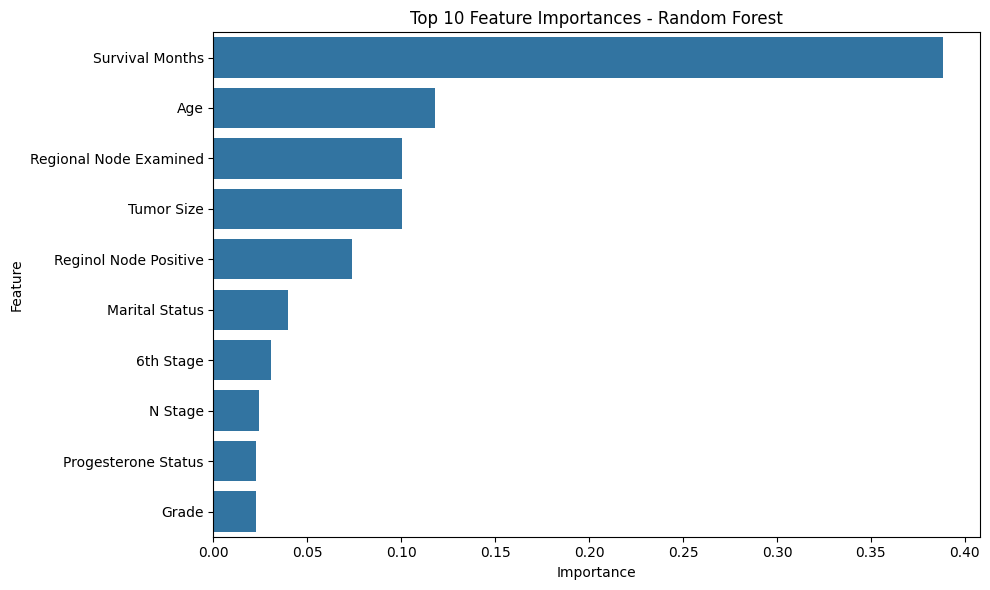

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_processed,y)
importances = rf_model.feature_importances_
features = X_processed.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

##### Splitting Data

In [17]:
#Encoding Target Column
b_cancer['Status'] = b_cancer['Status'].astype(str).str.strip().str.lower()
b_cancer['Status'] = b_cancer['Status'].map({'alive': 1, 'dead': 0})

In [18]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X_processed,y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3219, 15), (805, 15), (3219,), (805,))

In [19]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({1: 2726, 0: 493})
After SMOTE: Counter({1: 2726, 0: 2726})


After applying SMOTE, the target classes were balanced. This allows the model to learn patterns for both 'Alive' and 'Dead' patients more fairly. Evaluation metrics like recall and F1-score improved for the minority class.

### B. Training/Testing Models

##### Hyperparameter Tuning Example: Random Forest

In [20]:
# Define parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)
# Best parameters
print("Best Parameters:", grid_search.best_params_)
# Best model
best_rf_model = grid_search.best_estimator_
# Evaluate on test data
y_pred = best_rf_model.predict(X_test) # corrected: X_test, not X_test_scaled
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.8732919254658386


#### Model Training and Evaluation


==== K-Nearest Neighbors ====
              precision    recall  f1-score   support

           0       0.61      0.22      0.32       123
           1       0.87      0.98      0.92       682

    accuracy                           0.86       805
   macro avg       0.74      0.60      0.62       805
weighted avg       0.83      0.86      0.83       805



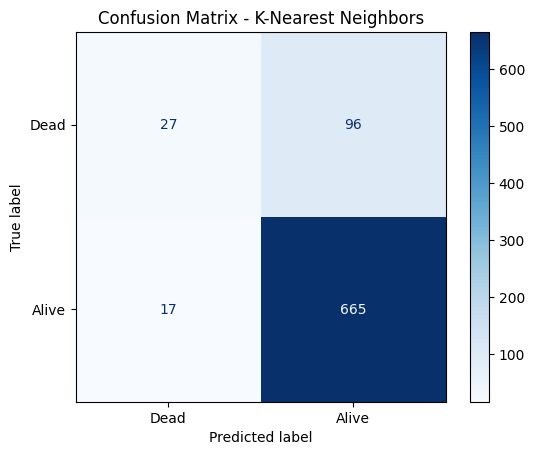

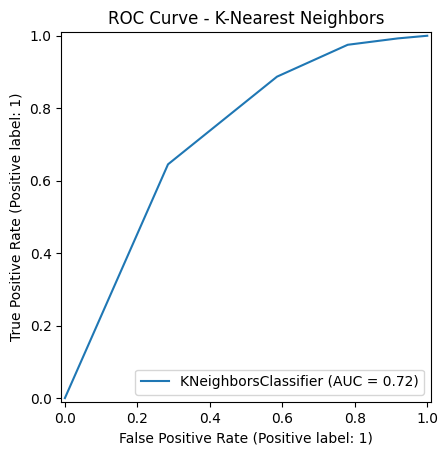


==== Logistic Regression ====
              precision    recall  f1-score   support

           0       0.78      0.37      0.51       123
           1       0.90      0.98      0.94       682

    accuracy                           0.89       805
   macro avg       0.84      0.68      0.72       805
weighted avg       0.88      0.89      0.87       805



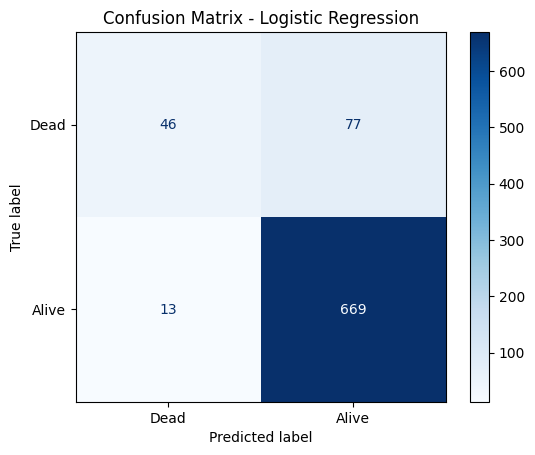

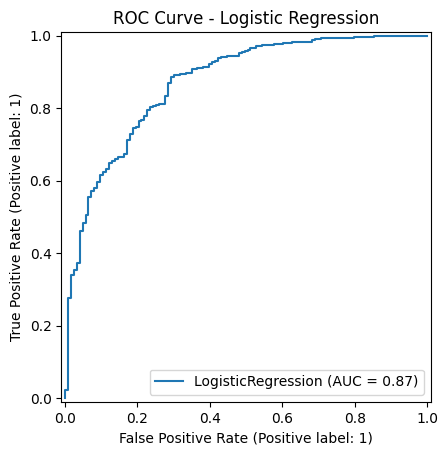


==== Decision Tree ====
              precision    recall  f1-score   support

           0       0.42      0.47      0.44       123
           1       0.90      0.88      0.89       682

    accuracy                           0.82       805
   macro avg       0.66      0.68      0.67       805
weighted avg       0.83      0.82      0.82       805



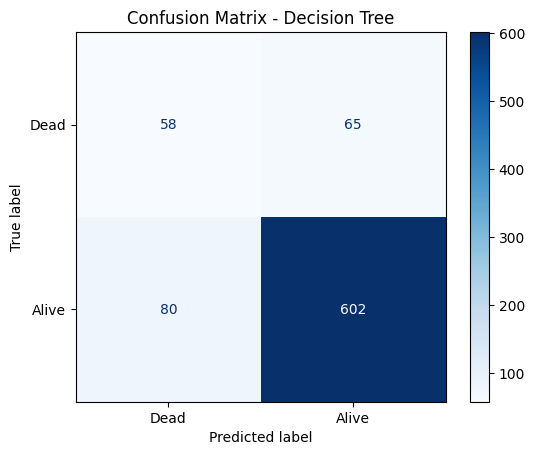

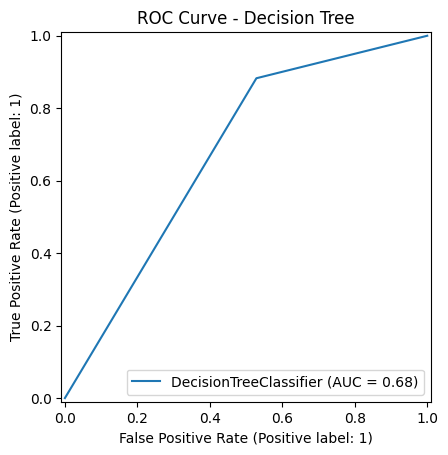


==== Random Forest (Tuned) ====
              precision    recall  f1-score   support

           0       0.82      0.50      0.62       123
           1       0.92      0.98      0.95       682

    accuracy                           0.91       805
   macro avg       0.87      0.74      0.78       805
weighted avg       0.90      0.91      0.90       805



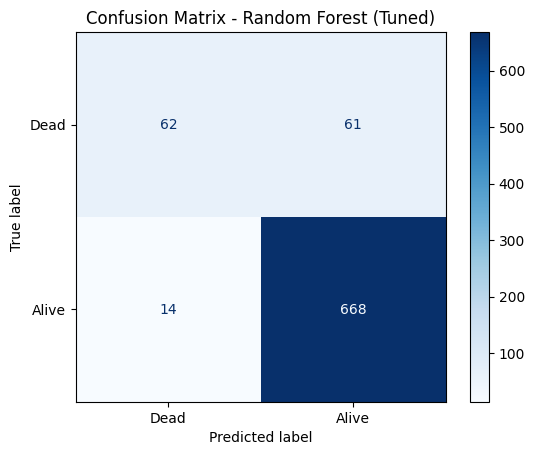

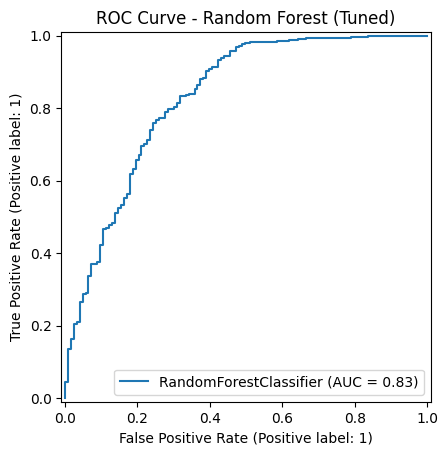


==== XGBoost ====
              precision    recall  f1-score   support

           0       0.69      0.48      0.57       123
           1       0.91      0.96      0.94       682

    accuracy                           0.89       805
   macro avg       0.80      0.72      0.75       805
weighted avg       0.88      0.89      0.88       805



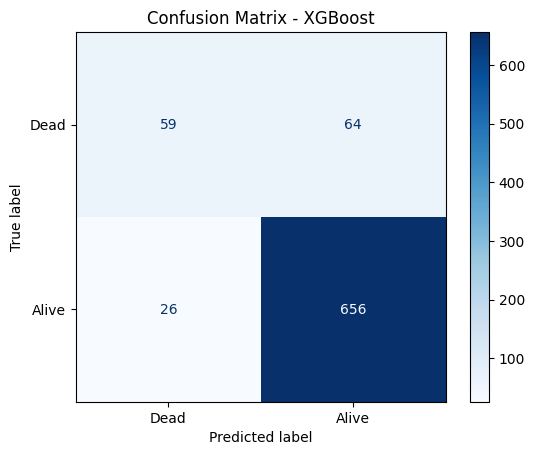

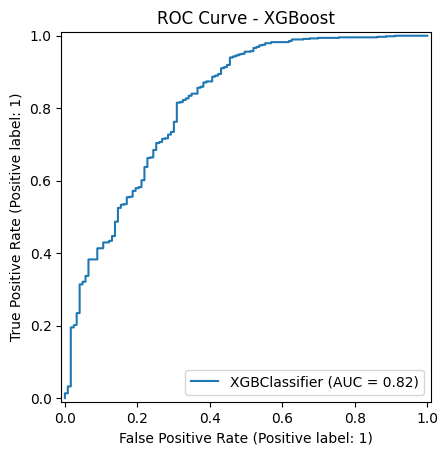

In [21]:
 
# Define models
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest (Tuned)": best_rf_model,  # you already tuned this earlier
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}

# Store results
results = {}

# Train and evaluate
for name, model in models.items():
    print(f"\n==== {name} ====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = pd.Series(y_pred).astype(int)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Store metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob) if y_prob is not None else None
    }

    # Reports
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=["Dead", "Alive"], cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()

    # ROC Curve
    if y_prob is not None:
        RocCurveDisplay.from_estimator(model, X_test, y_test)
        plt.title(f"ROC Curve - {name}")
        plt.show()


In [22]:

# Cross-validation scores (Random Forest)
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())


Cross-validation scores: [0.88975155 0.91925466 0.92236025 0.9052795  0.90202177]
Mean accuracy: 0.9077335471344531
Standard deviation: 0.011905252729081979


In [23]:
 # Convert results to DataFrame
results_df = pd.DataFrame(results).T
# Display the results in a styled table with highlighting for the best scores
results_df.style.highlight_max(axis=0, color='lightgreen')

# Display
display(results_df)


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
K-Nearest Neighbors,0.859627,0.873850,0.975073,0.921691,0.720913
Logistic Regression,0.888199,0.896783,0.980938,0.936975,0.870229
Decision Tree,0.819876,0.902549,0.882698,0.892513,0.677121
Random Forest (Tuned),0.906832,0.916324,0.979472,0.946846,0.829495
XGBoost,0.888199,0.911111,0.961877,0.935806,0.815279


#### Model Performance Comparison
We compiled the accuracy, precision, recall, F1-score, and ROC-AUC score for each machine learning model. This comparison helps us identify the most effective model for predicting patient survival outcomes.

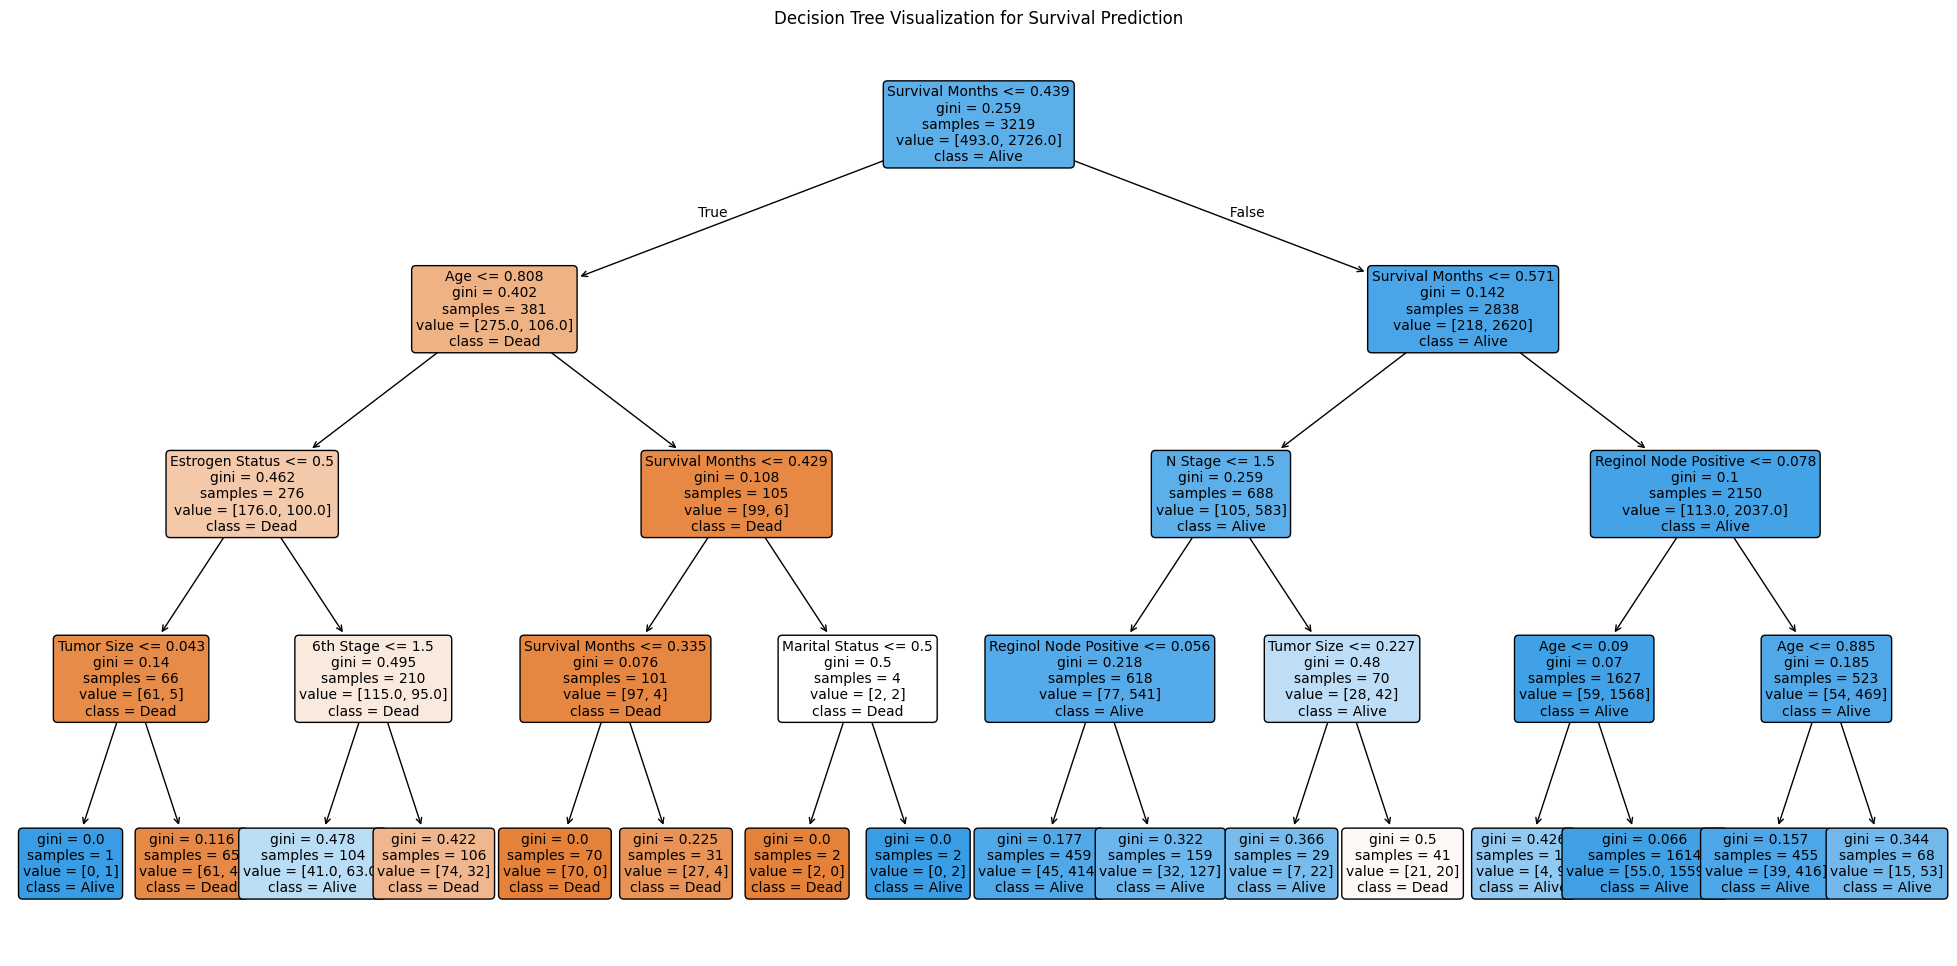

In [24]:
 
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Visualize
plt.figure(figsize=(25, 12))
plot_tree(
    dt_model, 
    feature_names=X_processed.columns,  # use original column names
    class_names=['Dead', 'Alive'], 
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization for Survival Prediction")
plt.show()


### Summary

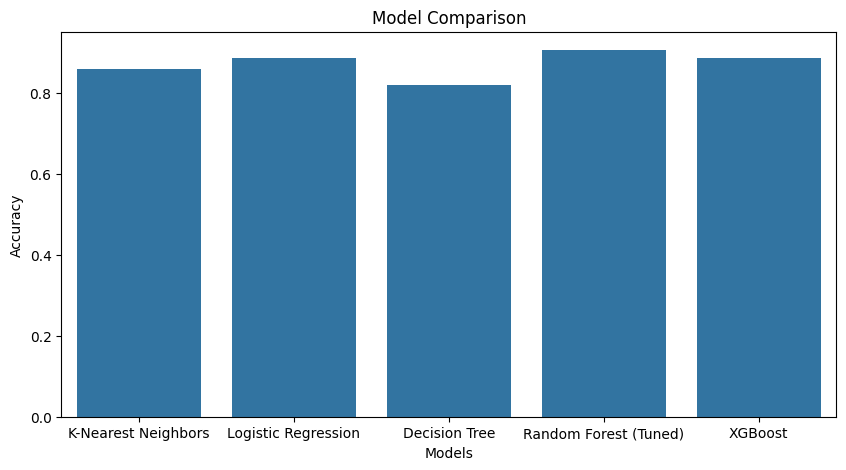

The best model is Random Forest (Tuned) with an accuracy of 0.91.


In [25]:

# Compute accuracies for each model
accuracies = {name: accuracy_score(y_test, model.predict(X_test)) for name, model in models.items()}

# Identify the best model
best_model_name = max(accuracies, key=accuracies.get)
best_model_accuracy = accuracies[best_model_name]

# Plot accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()

# Display the best model information below the graph
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}.")


## Conclusion:

In this project, we aimed to predict the survival status (Alive or Dead) of breast cancer patients using clinical features. After cleaning, encoding, balancing the dataset with SMOTE, and evaluating multiple machine learning models, we found the **Random Forest (with hyperparameter tuning)** to perform the best, achieving an accuracy of around **90.6%**.

### Key Takeaways:
- Proper preprocessing (outlier handling, encoding, balancing) significantly improved model performance.
- Feature importance analysis revealed that features like *Age*, *Tumor Size*, and *Survival Months* were most predictive.
- Random Forest, due to its ensemble nature, outperformed other models on multiple metrics including accuracy and ROC-AUC.

### Future Improvements:
- Include more clinical or genomic features if available.
- Apply advanced ensemble techniques like Gradient Boosting or LightGBM.
- Perform longitudinal prediction using time-series modeling if data is collected over time.
